In [1]:
import utils

import tensorflow as tf
import numpy as np

from unet import UNet
from unet import preprocess_input as pre_une
from lastengen import LASTENSequence
from scipy.ndimage import gaussian_filter

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
from skimage.io import imread

In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

In [3]:
try:
  # Disable all GPUS
  tf.config.set_visible_devices([], 'GPU')
  visible_devices = tf.config.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass
print(tf.__version__)
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.config.get_visible_devices('GPU'))
print(tf.config.get_visible_devices('CPU'))

2.2.0-rc3
[]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
width = 384 #768
height = 384 #768
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/validation'

model = UNet(filters=48, input_shape=(height, width, 1))

model.load_weights('/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas/experiments/2_2_segmentation/weights.100.hdf5')

In [5]:
validation_gen = LASTENSequence(path_validation,
                                batch_size=8,
                                preprocess_input=pre_une,
                                width=width,
                                height=height)

In [6]:
X, y = validation_gen[0]

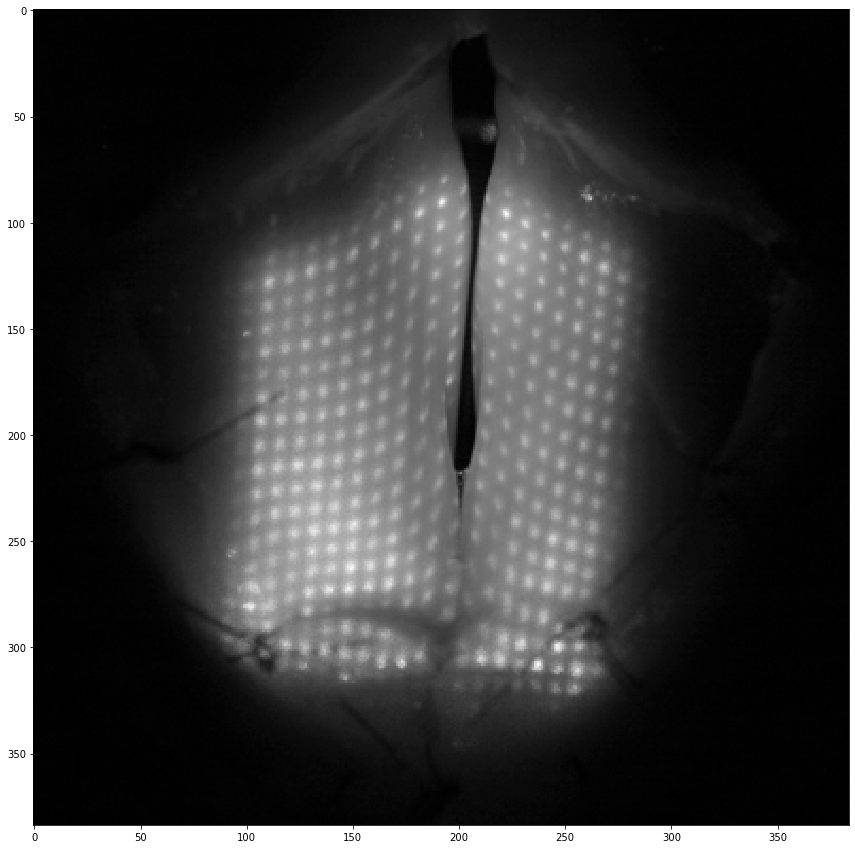

In [7]:
plt.imshow(X[0,:,:,0], cmap='gray')

In [8]:
y_pred = model.predict(X)

In [63]:
mask = y_pred[7,:,:,0]

IndexError: index 8 is out of bounds for axis 0 with size 8

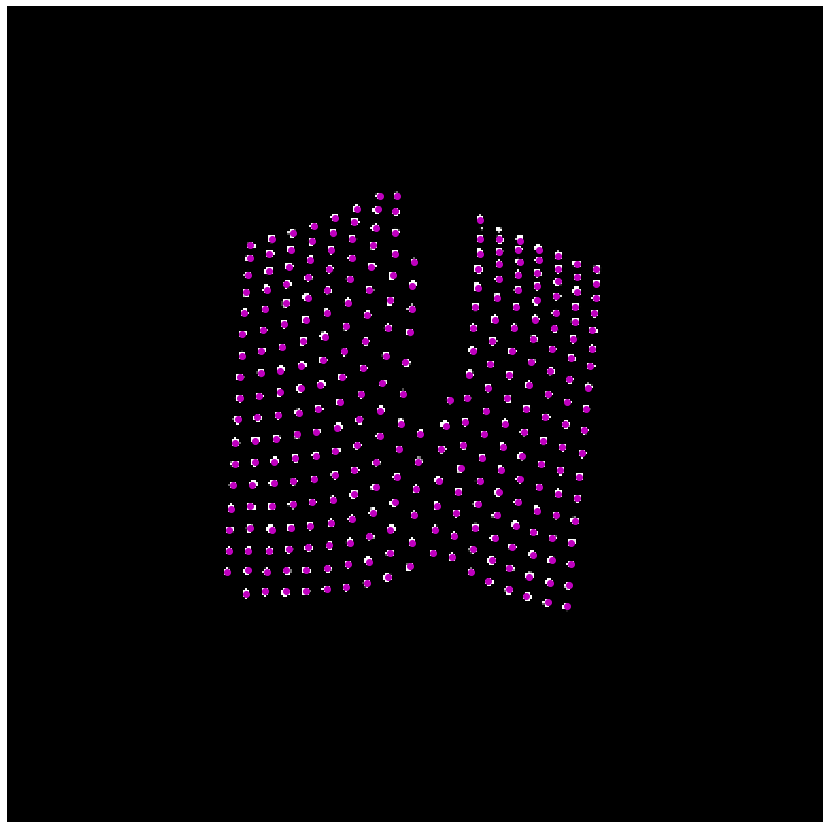

In [71]:
#sk_image = imread('experiments/2_2_segmentation/y_pred.png')

im = mask
#im = img_as_float(sk_image)
#im = img_as_float(data.coins())

im = gaussian_filter(im, sigma=2)

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=1, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=2, threshold_abs=0.1)

# display results
#fig, axes = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)
#ax = axes.ravel()
#ax[0].imshow(im, cmap=plt.cm.gray)
#ax[0].axis('off')
#ax[0].set_title('Original')

#ax[1].imshow(image_max, cmap=plt.cm.gray)
#ax[1].axis('off')
#ax[1].set_title('Maximum filter')

#ax[2].imshow(im, cmap=plt.cm.gray)
#ax[2].autoscale(False)
#ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
#ax[2].axis('off')
#ax[2].set_title('Peak local max')

#fig.tight_layout()

plt.imshow(mask, cmap="gray")
plt.plot(coordinates[:, 1], coordinates[:, 0], 'mo')
plt.axis('off')
#plt.show()
plt.savefig("7_peaking.png")